# Markov chains

A machine is either working or in repair center. If it is working today, then there is a 95% chance that it will be working tomorrow. If it is in repair center today, then theree is a 40% chance that it will be working tomorrow.

In [15]:
import numpy as np

P = np.matrix([[.95, .05], [.4, .6]])
print(P)

[[ 0.95  0.05]
 [ 0.4   0.6 ]]


Stationary distribution

$$\pi={\pi}P$$

In [17]:
# Searching for stationary distribution.

S, U = np.linalg.eig(P.T)  # eigenvalues and eigenvector
stationary = np.array(U[:, np.where(np.abs(S - 1.) < 1e-8)[0][0]].flat) # Search vector corresponding to eigenvalue of 1
stationary = stationary / np.sum(stationary)  # normalize
print(stationary)

[ 0.88888889  0.11111111]


Thus machine is broken 1 out of every 9 days in average.

## Poisson process

Let N(t) - random variable, number of incoming events at time t.

A Poisson process with rate lambda is a sequence of events such that the interarrival times are i.i.d. Exponential random variables with rate lambda and N(0) = 0.

$$N(t) \sim Poisson(\lambda t)$$

### Simple properties

Merging two independent Poisson processes into one.

$$N(t_1) + N(t_2) \sim Poisson(\lambda_1 t + \lambda_2 t)$$

Splitting Poisson process. Let two event types A and B. A events come with probability p, B events come with probability 1 - p.

$$N_A(t) \sim Poisson(\lambda p t)$$


We will use infinite markov chain where each state represents number of items in queue.
$$\lambda - \text{probability of arrival of new item, incoming rate}$$
$$\mu - \text{probability of departure, service rate}$$

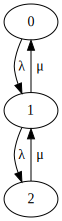

In [26]:
from graphviz import Digraph

dot = Digraph(comment='Markov Chain')

max_num = 3
for i in range(max_num):
  if i < max_num - 1:
    dot.edge(str(i), str(i+1), label='&lambda;')
  if i > 0:
    dot.edge(str(i), str(i-1), label='&mu;')

dot

## M/M/1 queue

 * first letter is a distribution of interarrival times (memoryless or exponential)
 * second letter is a distribution of service times.
 * third letter is a number of servers in the system

Stationary distribution:
 $$\pi_i=\left(\frac{\lambda}{\mu}\right)^i \pi_0$$ 
 
Mean number:
 $$E[N] = \frac{\rho}{1-\rho}$$ 
 
Variance of mean number:
 $$Var(N) = \frac{\rho}{(1-\rho)^2}, \text{where }  \rho=\frac{\lambda}{\mu} \text{ is an system utilization}$$
 
Mean time:
 $$E[T] = \frac{E[N]}{\lambda} = \frac{1}{\mu - \lambda}$$
 
Mean time in queue:
 $$E[T_Q] = E[T] - \frac{1}{\mu} = \frac{\rho}{\mu - \lambda}$$

**Example**: Given M/M/1 server what is the maximum allowable arrivale rate of jobs if the mean job size is 3 minutes and the mean waiting time must be kept under 6 minutes:

$$E[T] = E[T_Q] + E[S]$$

$$E[T] <= 3 + 6 = 9$$
$$\frac{1}{\mu - \lambda} <= 9$$
$$\mu = 1/3 \text{ jobs/minute}$$
$$\lambda <= \mu - \frac{1}{9} = \frac{2}{9}$$